In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# train_test_split:--> a function to split tphohe data into train and test sets

from sklearn.linear_model import LinearRegression
# LinearRegression:--> the model we are going to use

from sklearn.metrics import mean_squared_error, r2_score
# metrics:--> Contains modules and classes to evaluate the dataset
# mean_squared_error, r2_score:--> the matrics on which bases we are going to evaluate our model

import warnings
warnings.filterwarnings('ignore')

In [31]:
prices = pd.read_csv(r"C:\Users\direk\OneDrive\Desktop\housing_dataset_10000.csv")

prices.head(5)

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
0,5.930832,32,1.413281,3.015162,35.157038,-117.619479,448825.811802
1,14.285357,36,4.048700,1.209638,41.174981,-121.218564,1000000.000000
2,11.113912,50,4.705881,4.367499,40.266187,-115.858641,868697.299208
3,9.180548,37,1.872029,5.844742,37.793474,-117.757255,658554.482477
4,2.762270,48,3.123108,4.276306,41.122435,-115.376513,186813.517855


In [3]:
prices.describe()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.665314,25.908100,5.571555,3.479740,36.980898,-118.996705,596339.603251
std,4.170637,14.803167,2.583875,1.437387,2.895117,2.882673,310141.731949
min,0.500169,1.000000,1.000433,1.000028,32.000167,-123.998953,50000.000000
25%,4.071769,13.000000,3.359369,2.227868,34.469042,-121.485590,323050.615472
50%,7.641665,26.000000,5.606155,3.489937,36.940875,-118.969356,610138.872584
75%,11.230092,39.000000,7.764165,4.705109,39.515793,-116.503292,898622.066400
max,14.995906,51.000000,9.999109,5.998947,41.999721,-114.000430,1000000.000000


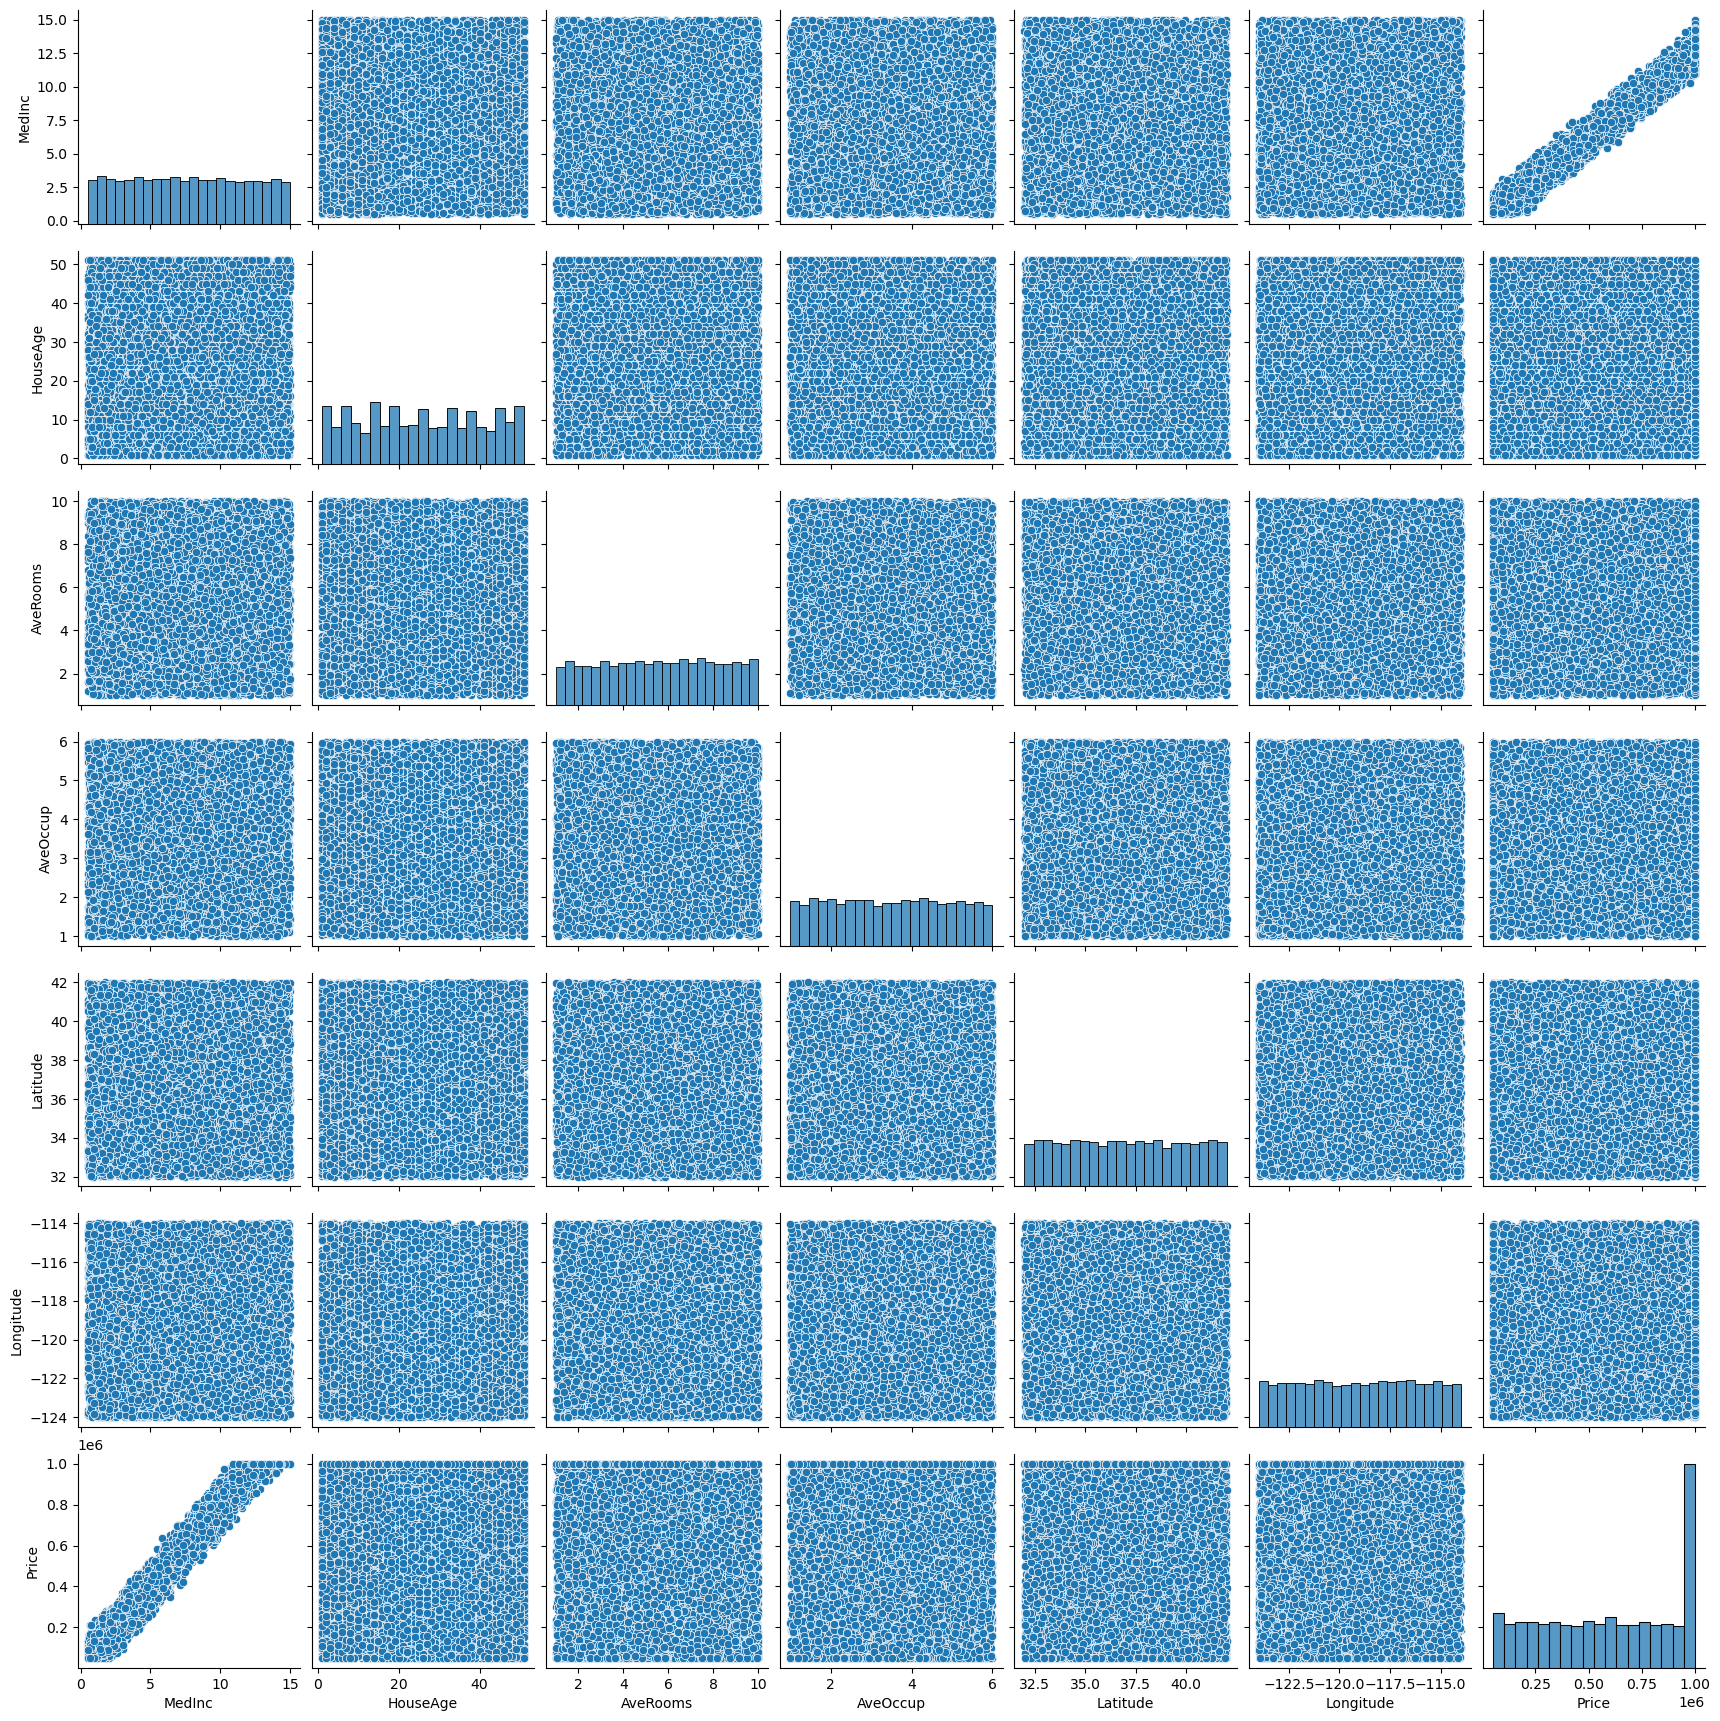

In [4]:
# Pairplot to visualize relationships between variables

sns.pairplot(prices)

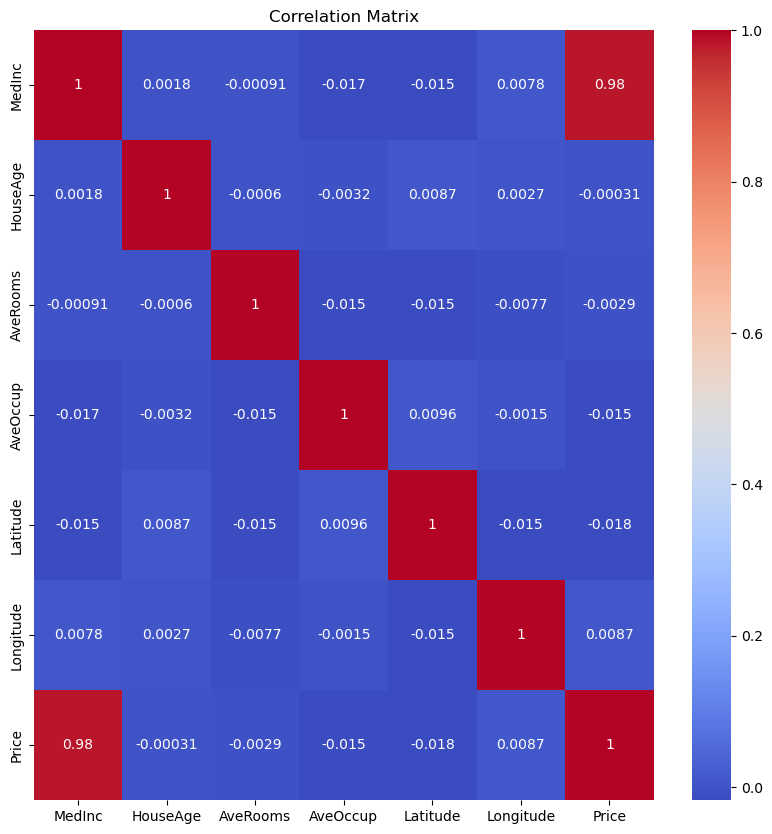

In [5]:
# Correlation Matrix

correlation_matrix = prices.corr()

plt.figure(figsize = (10, 10))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title('Correlation Matrix')

plt.show()

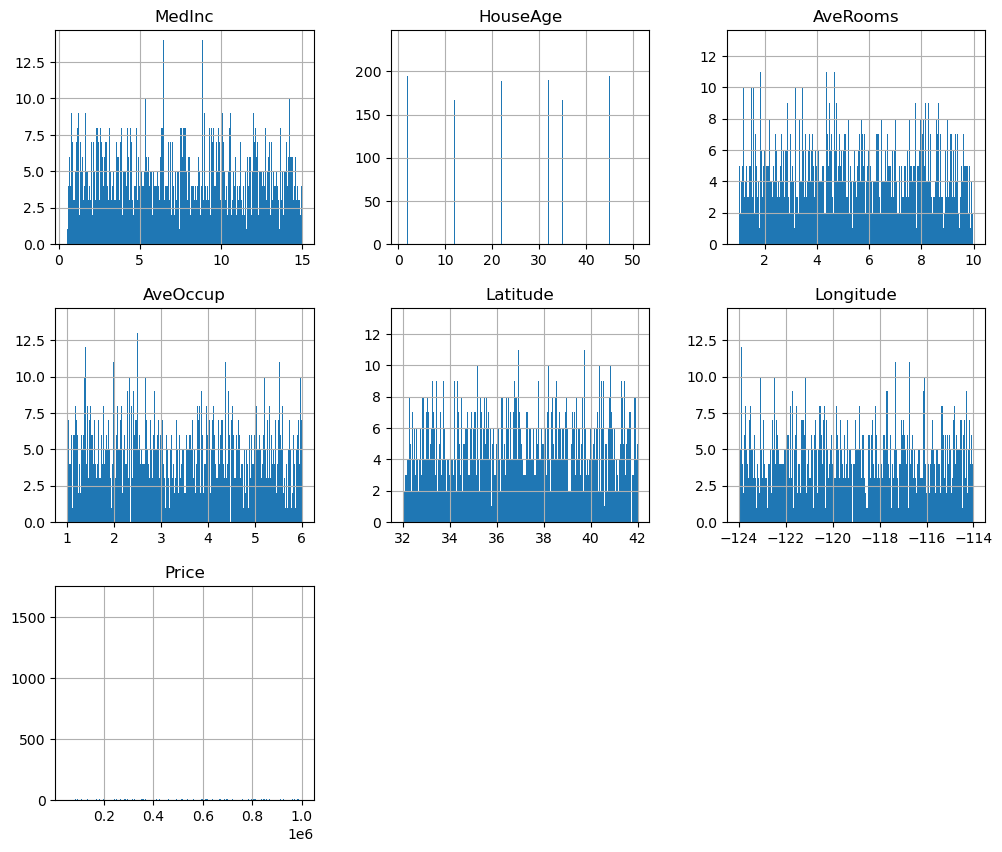

In [6]:
# Histogram of individual features

prices.hist(figsize = (12, 10), bins = 2000)

plt.show()

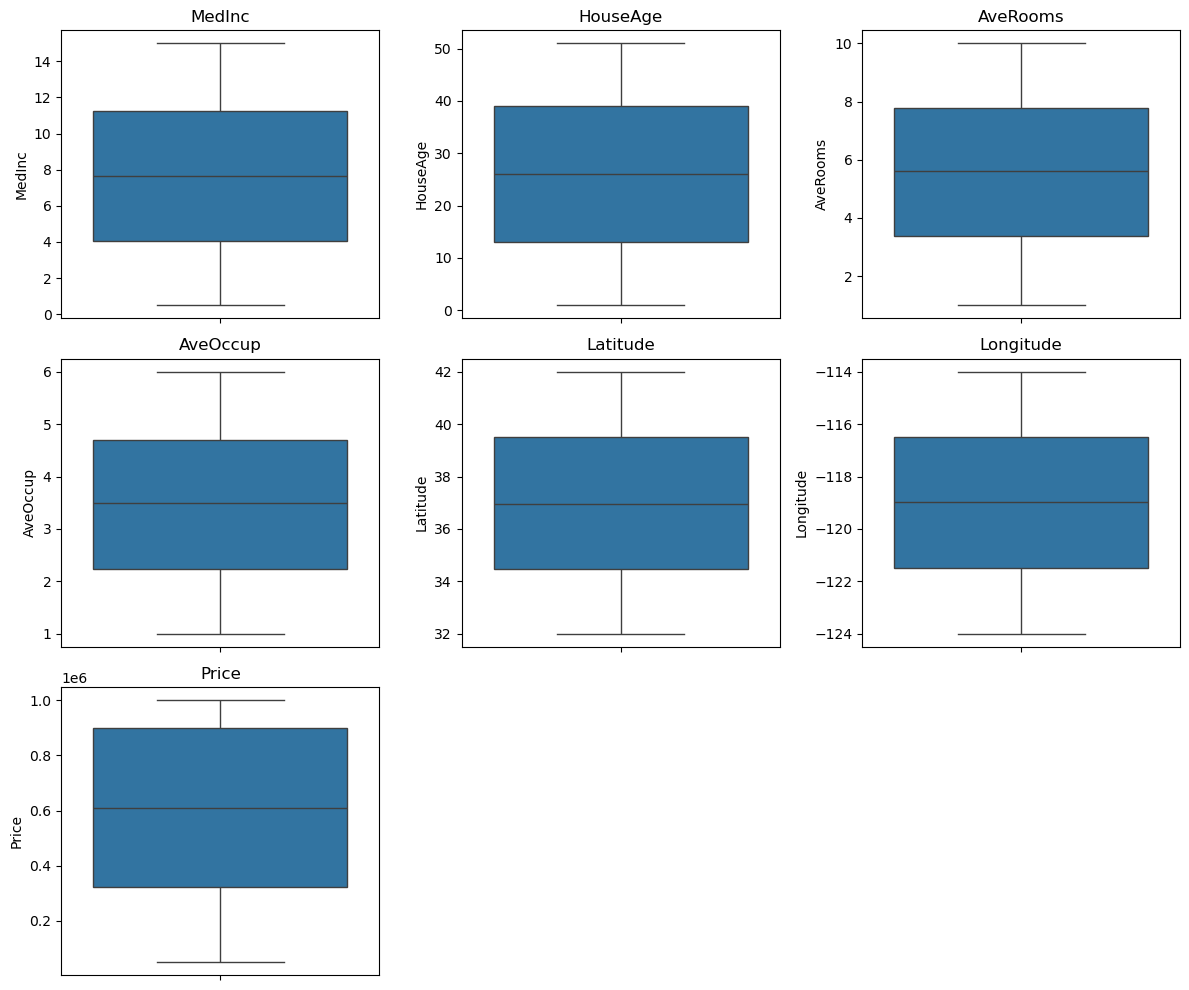

In [7]:
# Box Plot to check for outliers

plt.figure(figsize = (12, 10))

for i, column in enumerate(prices.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(prices[column])
    plt.title(column)
    
plt.tight_layout()

plt.show()

In [8]:
# Simple Linear Regeression

X = prices[['MedInc']] # Predictor

y = prices[['Price']] # Target

In [9]:
# Splitting the dataset into traning and testing sets

# This method is called as tuple and packing
# from sklearn.model_selection import train_test_split
# train_test_split:--> a function to split the data into train and split sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# test_size = 0.2-->20% data will be used for testing

# random_state = 42-->for controlling randomization of the values

# X_train-->80% data here for traning and X_test-->20% data here for test purpose from the MedInc column

In [10]:
# Creating and training the model

# from sklearn.linear_model import LinearRegression
# LinearRegression:--> the model we are going to use
simple_model = LinearRegression()

simple_model.fit(X_train, y_train)

# .fit(X_train, y_train)-->it is a method inside the LinearRegression() class by which we can fit our data in our algorithm.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# Predictions

y_pred = simple_model.predict(X_test)

# .predict(X_test)-->it is a method to predict values on the test set

In [12]:
# Evaluate the model

# from sklearn.metrics import mean_squared_error, r2_score
# metrics:--> Contains modules and classes to evaluate the dataset
# mean_squared_error, r2_score:--> the matrics on which bases we are going to evaluate our model

print(f'Mean Suqared Error(M.S.E): {mean_squared_error(y_test, y_pred)}')

print(f'R^2 Score(R.M.S.E): {r2_score(y_test, y_pred)}')

Mean Suqared Error(M.S.E): 3148370463.7224045
R^2 Score(R.M.S.E): 0.9672652790959431


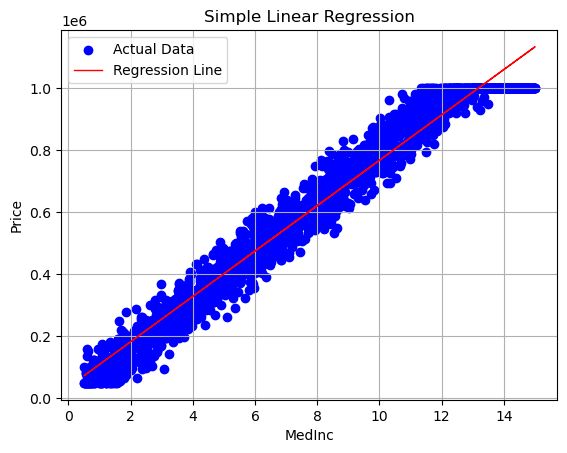

In [14]:
# Plotting the regression lines:-
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual Data')

# y_pred = simple_model.predict(X_test)
# .predict(X_test)-->it is a method to predict values on the test set
plt.plot(X_test, y_pred, color = 'red', linewidth = 1, label = 'Regression Line')

plt.xlabel('MedInc')

plt.ylabel('Price')

plt.title('Simple Linear Regression')

plt.legend()

plt.grid(True)

plt.show()

In [20]:
# Assuming the model has already been trained and the relevant libraries have been imported

# Input MedInc value from the user
medinc_value = float(input("Enter the MedInc value:"))

# Convert the input to a 2D array fro the model
medinc_value_array = np.array([[medinc_value]])

# Predict the house price using the trained model
predicted_price = simple_model.predict(medinc_value_array)

predicted_price_value = predicted_price[0][0]

print(
    f"The predicted house price for the MedInc value of {medinc_value} is: "
    f"${predicted_price_value:.2f}"
)

Enter the MedInc value: 14.2


The predicted house price for the MedInc value of 14.2 is: $1074256.82


In [19]:
X_multi = prices[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
y_multi = prices[['Price']]

In [22]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
   X_multi,
    y_multi,
    test_size = 0.2,
    random_state = 42
)

In [24]:
# Creating and training the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate
print(f"Mean Squared Error(M.S.E):{y_test_multi, y_pred_multi}")
print(f"R^2 Score: {r2_score(y_test_multi, y_pred_multi)}")


Mean Squared Error(M.S.E):(               Price
6252   376409.737744
4684   871610.252428
1731   779597.233991
4742    50000.000000
4521   674628.306141
...              ...
6412  1000000.000000
8285   999040.011287
7853   421814.275902
1095   264599.657960
6929   871629.241322

[2000 rows x 1 columns], array([[431235.68444142],
       [891890.79290468],
       [734646.72476004],
       ...,
       [385759.38209983],
       [258071.24962111],
       [750964.94325364]], shape=(2000, 1)))
R^2 Score: 0.9672659955079119


In [30]:
# Displaying the coefficient of the modal
coefficients = pd.DataFrame(multi_model.coef_.T, X_multi.columns, columns = ['Coefficient'])
print(coefficients)
# .coef_ is a attribute inside the multimodel object which is going to help us see the coefficients

            Coefficient
MedInc     73096.829206
HouseAge     -24.324340
AveRooms    -119.047066
AveOccup     563.632492
Latitude    -249.786195
Longitude    219.309658
